In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
#Loading dataset
dt = pd.read_csv("nasa.csv")
dt

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [3]:
dt.describe

<bound method NDFrame.describe of       Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3703080  3703080              21.600            0.127220   
1              3723955  3723955              21.300            0.146068   
2              2446862  2446862              20.300            0.231502   
3              3092506  3092506              27.400            0.008801   
4              3514799  3514799              21.600            0.127220   
...                ...      ...                 ...                 ...   
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \

In [4]:
#Columns present in the dataset
dt.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [5]:
#Count of True and False in the data
dt['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [6]:
#Mapping the True and False value to 1 and 0 respectively
dt['Hazardous'] = dt['Hazardous'].map({True: 1, False: 0})

In [7]:
#Removing unwanted columns
del dt['Close Approach Date']
del dt['Orbiting Body']
del dt['Orbit Determination Date']
del dt['Equinox']
del dt['Name']
del dt['Neo Reference ID']

In [8]:
dt.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [9]:
#Checking for missing values
dt.isnull().sum() #no missing values

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist 

In [10]:
#Checking for duplicate value
dt.duplicated().sum() #No duplicate values

0

<AxesSubplot:>

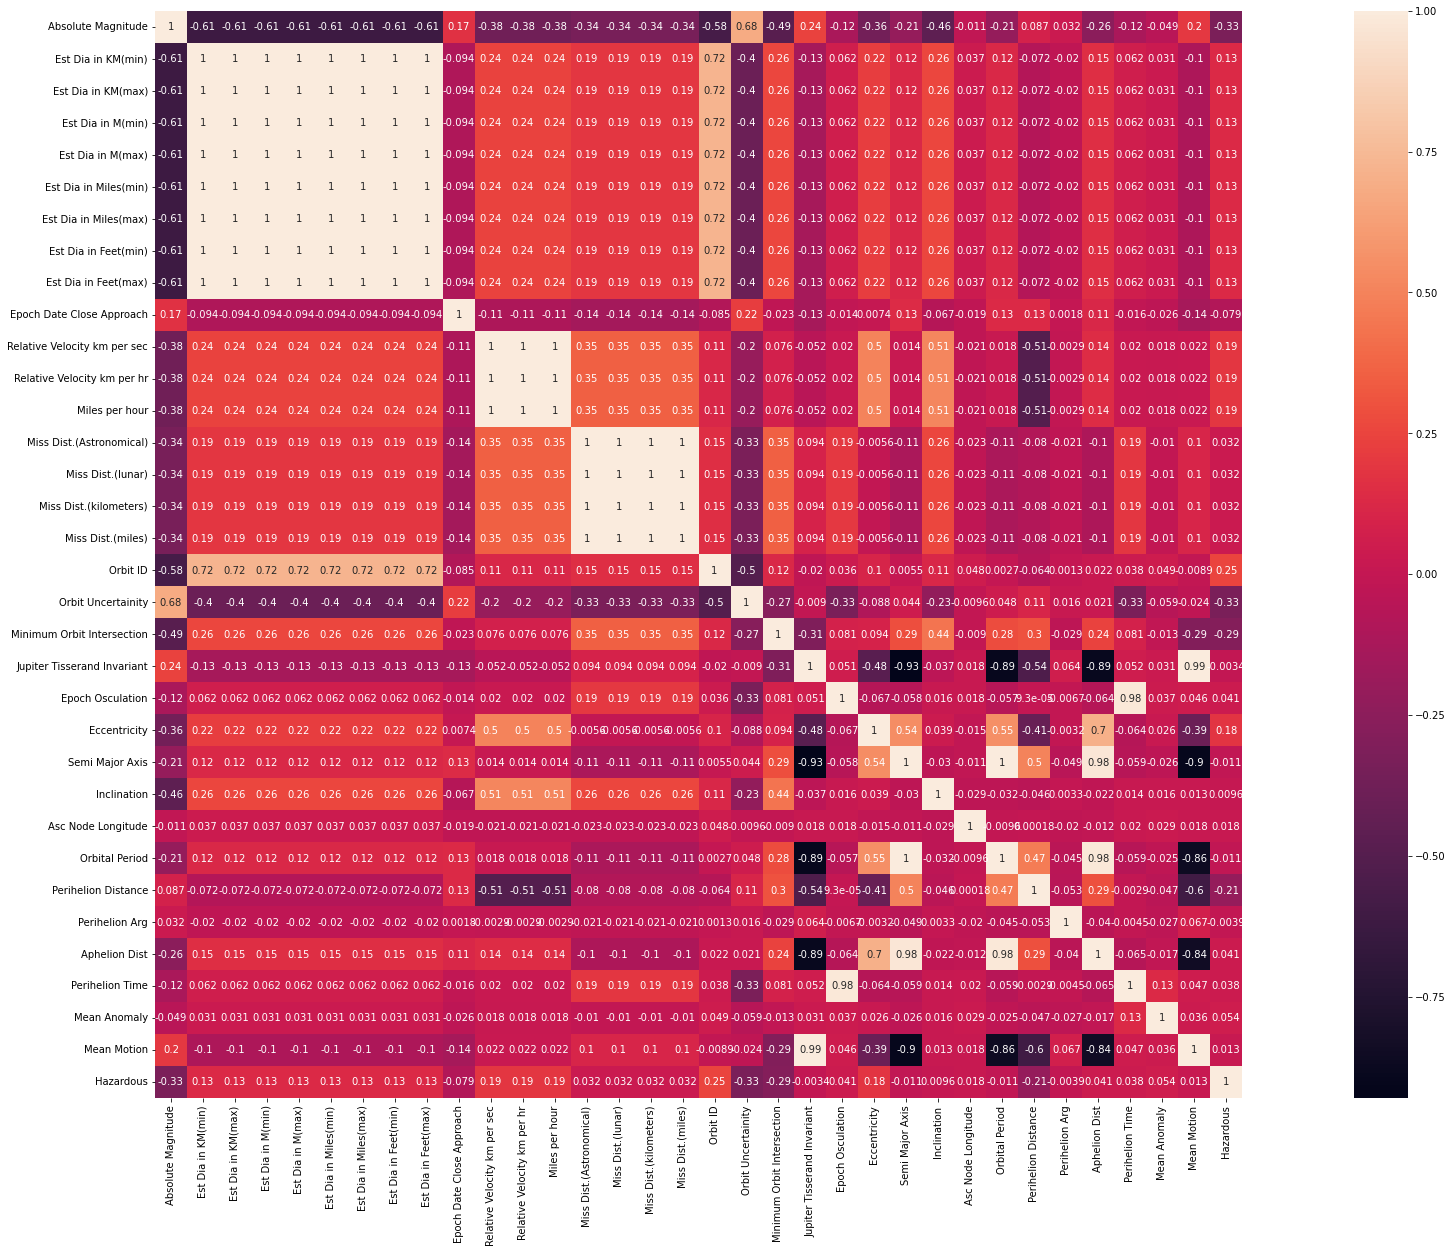

In [11]:
#Finding corelated features
cor = dt.corr()
f, ax = plt.subplots(figsize = (40, 20))
sns.heatmap(cor, vmax = 1, square = True, annot = True)

In [12]:
#Deleting unwanted data
del dt["Est Dia in M(min)"]
del dt["Est Dia in M(max)"]
del dt["Est Dia in Miles(min)"]
del dt["Est Dia in Miles(max)"]
del dt["Est Dia in Feet(min)"]
del dt["Est Dia in Feet(max)"]

<AxesSubplot:>

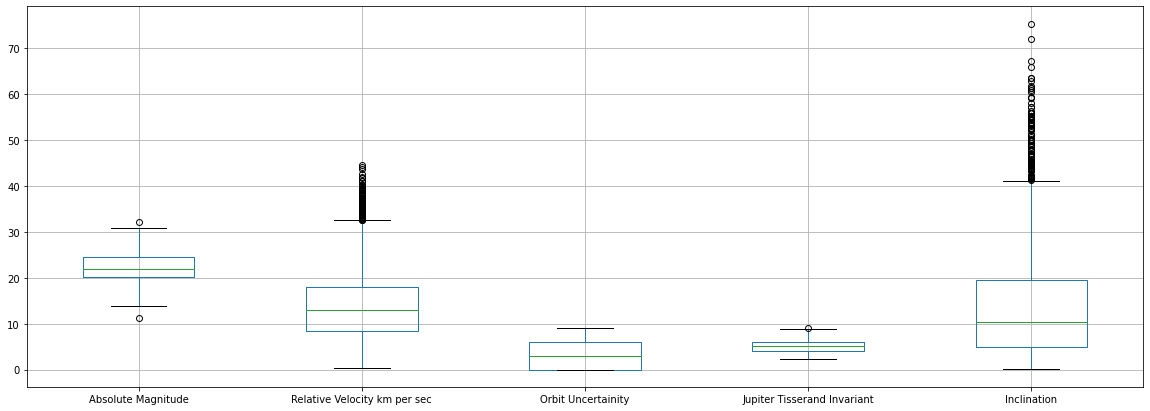

In [13]:
#Data visualisation
plt.figure(figsize = (20, 7))
dt.boxplot(column = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant', 'Inclination'])

<AxesSubplot:>

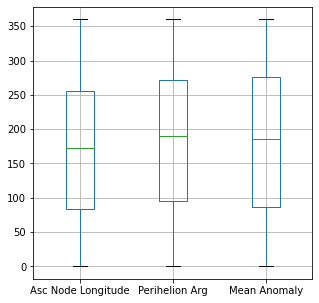

In [14]:
plt.figure(figsize = (5,5))
dt.boxplot(column = ['Asc Node Longitude', 'Perihelion Arg', 'Mean Anomaly'])

<AxesSubplot:>

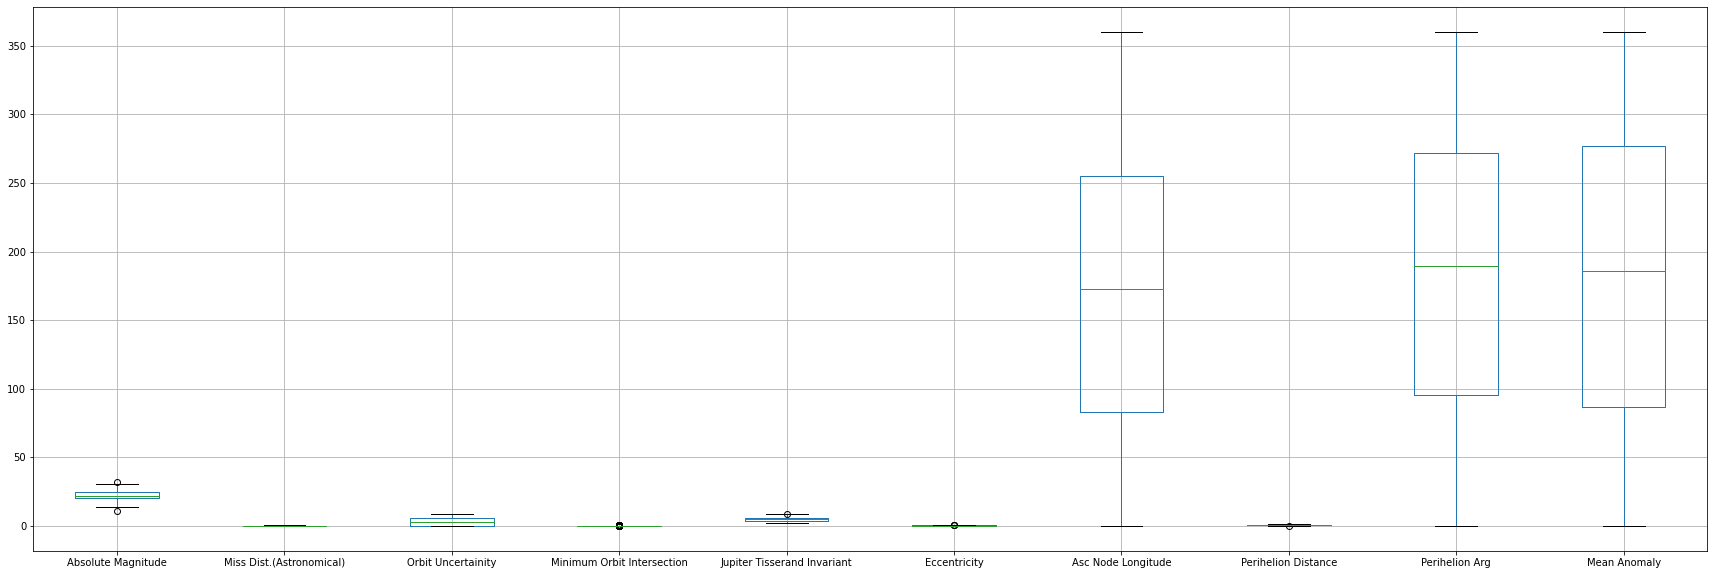

In [15]:
plt.figure(figsize = (30, 10))
dt.boxplot(column = ['Absolute Magnitude', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Eccentricity', 'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg', 'Mean Anomaly'])

<AxesSubplot:>

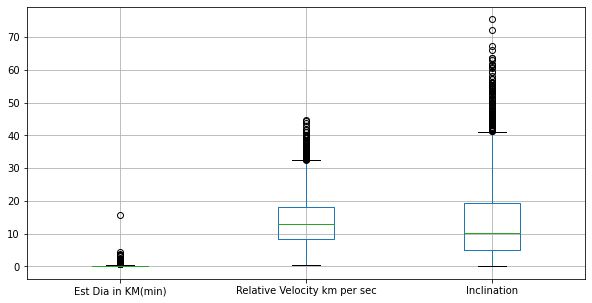

In [16]:
plt.figure(figsize = (10,5))
dt.boxplot(column = ['Est Dia in KM(min)','Relative Velocity km per sec', 'Inclination'])

<AxesSubplot:>

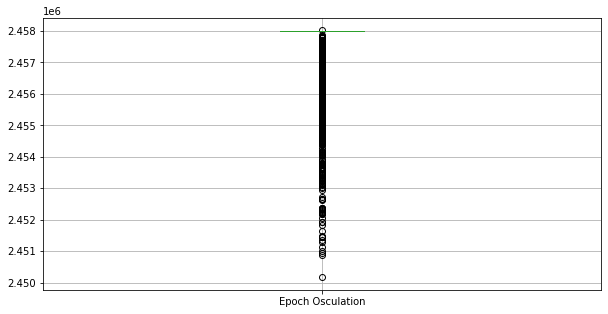

In [17]:
plt.figure(figsize = (10,5))
dt.boxplot(column = ['Epoch Osculation'])

In [18]:
dt.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [19]:
#Assigning values to x and y variables for model training
x = dt.iloc[:, :-1].values
y = dt.iloc[:, -1].values

In [20]:
#20% of data is used as test data
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2 , random_state = None)

In [21]:
q = pd.DataFrame(y_test)
q[0].values

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [22]:
w = pd.DataFrame(y_train)
w[0].values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
#Function for classification 
def classify(cla):
    y_pred = cla.predict(x_test)
    y_pred_train = cla.predict(x_train)
    return y_pred, y_pred_train

In [24]:
#Model Application
#Decision tree classifier model
cla = DecisionTreeClassifier()
cla.fit(x_train, y_train)
y_pred, y_pred_train = classify(cla)

In [25]:
#Confusion matrix
cy = confusion_matrix(y_pred, y_test)
cx = confusion_matrix(y_pred_train, y_train)
cy, cx

(array([[773,   1],
        [  0, 164]], dtype=int64),
 array([[3159,    0],
        [   0,  590]], dtype=int64))

In [26]:
#accuracy
print(round((cy[1][1] + cy[0][0])/len(y_test)*100, 2)) #accuracy of test set
print((cx[1][1] + cx[0][0])/len(y_train)*100) #accuracy of train set

99.89
100.0


<AxesSubplot:>

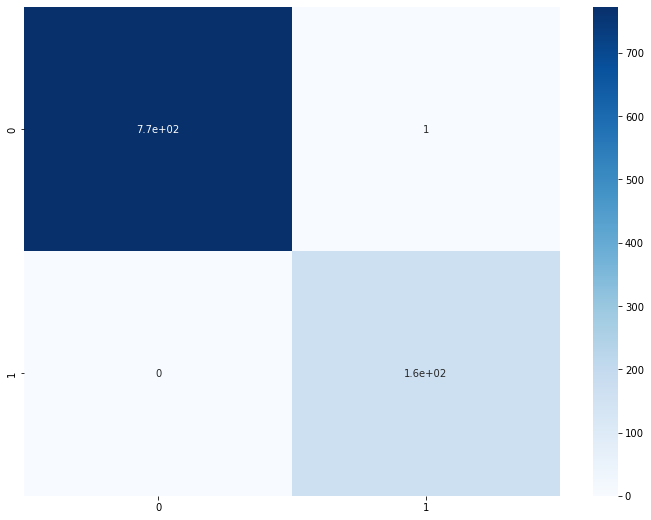

In [27]:
#Confusion matrix heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(cy, annot = True, cmap = "Blues")

In [28]:
#F1 score
round(f1_score(y_test, y_pred)*100, 2)

99.7

In [29]:
#Final result
print("Model : Decision Tree")
print("Accuracy Score : ", round((cy[1][1] + cy[0][0])/len(y_test)*100, 2))
print("F1 Score : ", round(f1_score(y_test, y_pred)*100, 2))

Model : Decision Tree
Accuracy Score :  99.89
F1 Score :  99.7
